<img src="https://drive.google.com/uc?id=1-d7H1l1lJ28_sLcd9Vvh_N-yro7CJZcZ" style="Width:1000px">

# 🚀 Modelling Near Earth Objects

This is a data problem that was part of the 2022/23 assessed coursework. Obviously the coursework will be different this year, but this gives you a sense of what is expected.

You are a consultant in scientific machine learning, and your first client is **NASA**! They have had a lot of success with their recent **Double Asteroid Redirection Test**, or **DART** mission: now, they have an increased buget and they want to spend it on some predictive machine learning. This is where you come into play: you will help **NASA** train a machine learning algorithm that can determine whether or not a near-Earth asteroid is <span style="color:teal">hazardous</span> (dangerous). <br>

### What NASA wants you to do is the following:

<p>❇️ <strong style="color:blue">Load the training data</strong> (<code>asteroid_training.csv</code>). This contains your <code>y</code> target (<code>hazardous</code>), and all the other potential features <code>X</code> that you can choose to use to predict <code>y</code>.</p>
<p>❇️ NASA says you can <strong style="color:blue">prepare the data</strong> anyway you feel is best (you have complete freedom here). Save the final prepared data as variable named <code>X_train_prep</code> in your notebook. Note that this needs to be a Pandas DataFrame (used in the code test).</p>
<p>❇️ In order <strong>to be fair</strong> when assessing your work against others, NASA informs you that for any algorithm where a <strong style="color:blue">random state</strong> is needed you should use <code>random_state=42</code>. Note that this does not necessarily imply that you need an operation that requires a random_state: but if you do, use 42 so you can be fairly assessed against other biders!</p>
<p>❇️ Once your data is prepared, NASA wants you to <strong style="color:blue">train a predictive machine learning algorithm</strong>. But they give you <span style="color:red"><strong>further constraints</strong></span>:
    <li>1. Your algorithm can only be a <strong style="color:purple">linear model</strong> (so don't use any fancy RandomForest, KNN or XGBoost: NASA is too old school for that)</li>
    <li>2. NASA will evaluate your model against metrics that determines the <strong style="color:purple">overall performance of the model at any threshold</strong></li></p>
<p>❇️ Using your <code>final_model</code>, <strong style="color:blue">estimate</strong> the performance of your algorithm on unseen data and save this in a variable called <code>predicted_performance</code></p>
<p>❇️ Using your <code>final_model</code>, <strong style="color:blue">predict</strong> whether or not the unknown asteroids contained in the file <code>unknown_asteroids.csv</code> are hazardous. Your prediction should be an array of <code>0</code> (not hazardous) and <code>1</code> (hazardous)</p>
<p>❇️ <strong style="color:blue">Save your prediction to file</strong> (see pandas's <code>to_csv</code>) making sure to <strong>NOT INCLUDE THE INDEX</strong>. The filename should be <code>predictions.csv</code></p>
<br>

#### NASA will judge your work on the following criteria:
<p>✅ How clean and easy to read your code is, and how well structure your notebook is: this includes using markdown cells to explain your decisions if needed (don't justify all basic decisions though: the code needs to speak for itself)</p>
<p>✅ The overall performance of your algorithm at predicting whether a near-Earth object is hazardous <strong>on an unseen dataset</strong> (see note above in point <code>2</code>).</p>
<p>✅ Whether or not you have demonstrated through code that your solution follows the best practices of data science.</p>
<br>

This is a pretty open-ended exercise, so be imaginative. Don't forget to do some solid EDA to understand your data. Also, always use `random_state=42` for the test to assess you fairly. And don't forget all the best practices you have learned in the course!

### Opening the data

In [1]:
from nbta.utils import download_data
download_data(id='10aqsyytz1F2qky7CTS5LOyGy99fQOPGC')

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('raw_data/asteroid_training.csv')
unknown_objects = pd.read_csv('raw_data/unknown_asteroids.csv')


In [3]:
data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,26150198,Object_26150198,0.031956,0.071456,75374.759095,1.070689e+06,Earth,False,24.60,False
1,7025688,Object_7025688,0.133216,0.297879,33274.114790,1.598217e+07,Earth,False,21.50,False
2,43368461,Object_43368461,0.043507,0.097284,74702.349802,2.330585e+06,Earth,False,23.93,False
3,41099354,Object_41099354,0.012149,0.027167,33078.313997,4.561178e+07,Earth,False,26.70,False
4,25572576,Object_25572576,0.058151,0.130029,51956.093518,3.613123e+06,Earth,False,23.30,False
...,...,...,...,...,...,...,...,...,...,...
9078,36478193,Object_36478193,0.009006,0.020139,23099.050602,5.684655e+06,Earth,False,27.35,False
9079,16202568,Object_16202568,0.265800,0.594347,10471.823883,5.344484e+07,Earth,False,20.00,False
9080,46971691,Object_46971691,0.934448,2.089488,63346.840101,6.688082e+07,Earth,False,17.27,True
9081,14373311,Object_14373311,0.007666,0.017141,23682.903814,4.247773e+05,Earth,False,27.70,False


In [4]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083000e+03,9083.000000,9083.000000,9083.000000,9.083000e+03,9083.000000
mean,2.515456e+07,0.125683,0.281035,47658.171830,3.696279e+07,23.568789
std,1.424013e+07,0.335222,0.749580,25006.496725,2.217602e+07,2.878480
min,5.096120e+05,0.000818,0.001828,494.185355,1.367200e+04,10.310000
25%,1.286088e+07,0.019256,0.043057,28374.520110,1.712688e+07,21.400000
50%,2.516307e+07,0.048368,0.108153,44023.051894,3.819473e+07,23.700000
75%,3.757898e+07,0.139494,0.311918,62433.931810,5.596681e+07,25.700000
max,4.999238e+07,23.043847,51.527608,183551.907545,7.479223e+07,32.560000


# Your work

Now you can explore the dataset and train your model as you see fit.

<h1 style="color:green">FAIR WARNING:</h1>
<p>This solution is quite complete, and this is <strong style="color:blue">more than what you need to do to get a first class mark</strong> at the test. But it gives you a good idea of what a possible first class solution is, and what the best practice approach would be.</p>

In [5]:
# All imports here
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Assessing
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance

# Initial preparation
Let's do the following:
1. Check for duplicates, and remove them if needed
2. Separate our label (`y` = `hazardous`) from our features (`X`)
3. Train-test-split our data into a training, validation and test sets.
4. Then move on to EDA

In [6]:
data.duplicated().sum()

0

In [7]:
X = data.drop(columns=['hazardous'])
y = data.hazardous

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.8, random_state=42)

# EDA

Let's inspect our data carefully now. Here is what we will do:
1. Check for missing values and data types
2. Check for the distribution of the features - are they all useful?
3. Plot a correlation matrix for our feature - do we have strong correlations?
4. Plot histograms for our features - are they reasonably gaussian or do they need some feature engineering?
5. Check for the distribution of our labels - is this a balanced dataset?

**And remember:** we do this <span style="color:red">with the X_train only!!!</span>

In [9]:
X_train.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
dtype: int64

In [10]:
X_train.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
dtype: object

***Observation***: The `id` is clearly an integer id for the object and won't be useful for us. The `name` is also not useful (a string with the name of the object). `orbiting_body` is a string that will need further inspection, and so does `sentry_object` (a boolean).

In [11]:
# Let's see what orbiting_body is made of:
X_train.orbiting_body.value_counts()

orbiting_body
Earth    5086
Name: count, dtype: int64

In [12]:
# How about sentry_object?
X_train.sentry_object.value_counts()

sentry_object
False    5086
Name: count, dtype: int64

***Observations***: both of the features above are constant and thus won't be useful at all for modelling. We can drop them and focus only on the numerical values, which makes our life much easier!

In [13]:
features = X_train.select_dtypes(exclude=['int64','object', 'bool']).columns
features

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

In [14]:
X_train = X_train[features] # Let's focus on the good features

### Correlations
Let's explore the correlations between features:

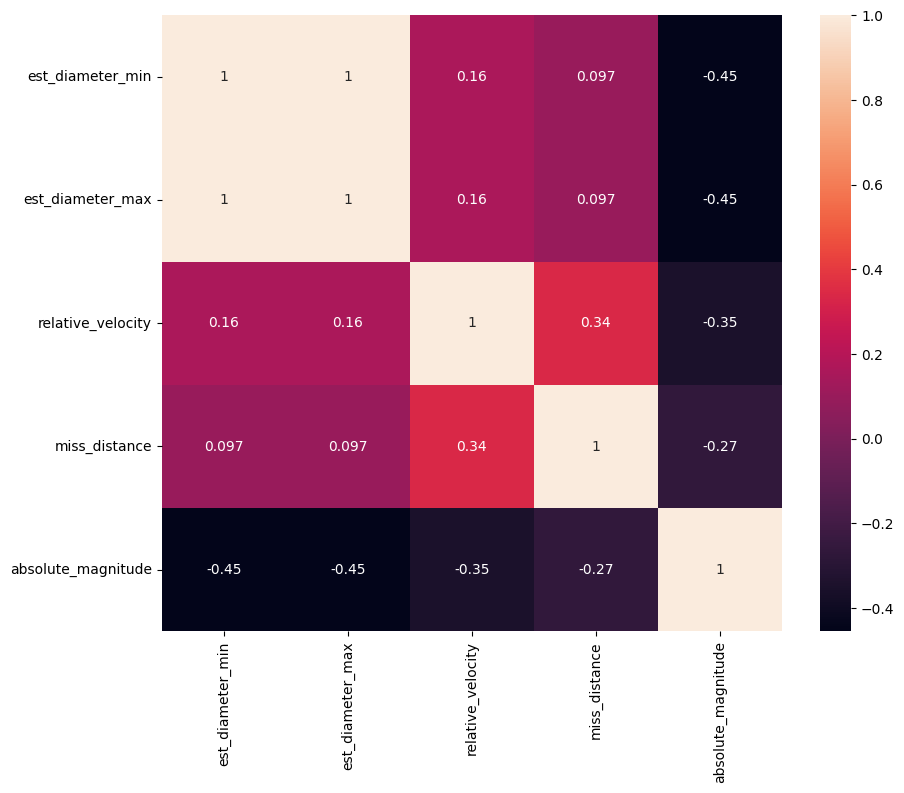

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
corr = X_train.corr()

sns.heatmap(corr, annot=corr, ax=ax);

***Observations:*** Although there are some strong correlations, most are too high which is good. However, `est_diameter_min` and `est_diameter_max` are identical so let's drop one of the two!

In [16]:
X_train.drop(columns=['est_diameter_max'], inplace=True)
features = X_train.columns

### Scatter matrix
We do not have a lot of features, so this seems like a good opportunity to draw a scatter matrix. We will then also look at the histograms in more detail.

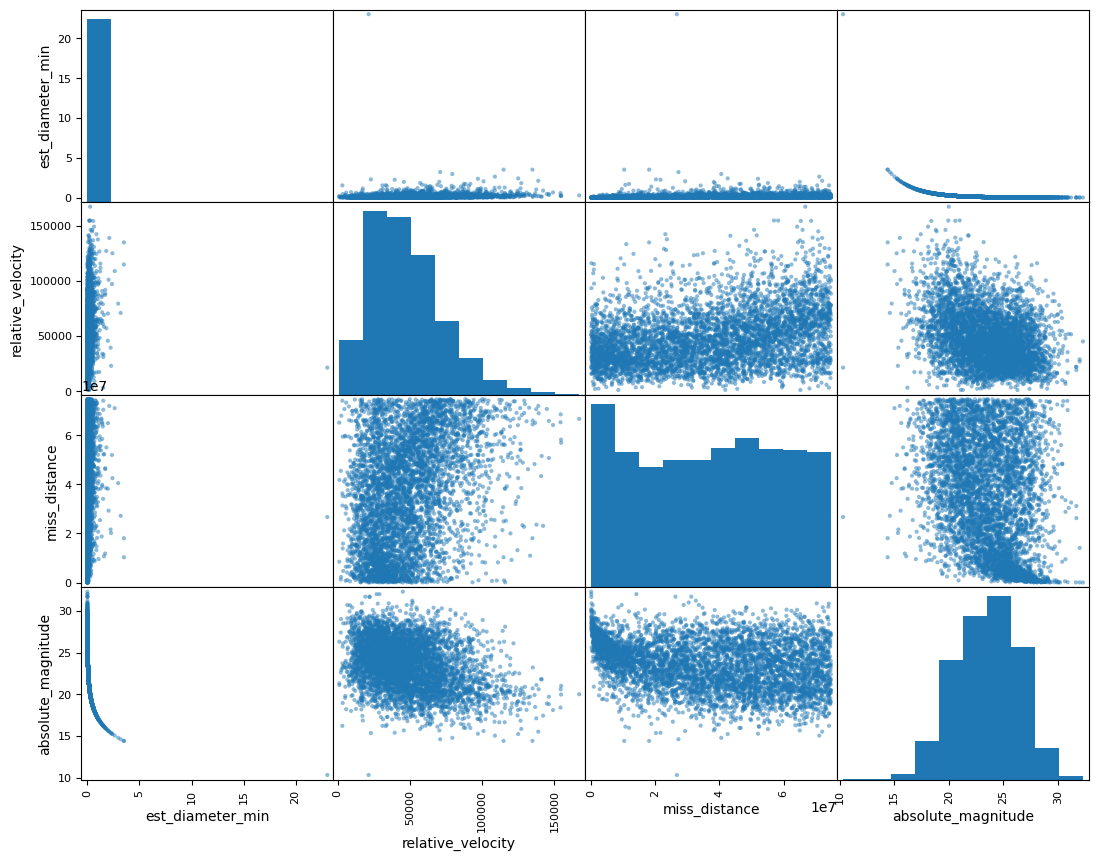

In [17]:
pd.plotting.scatter_matrix(X_train, figsize=(13,10));

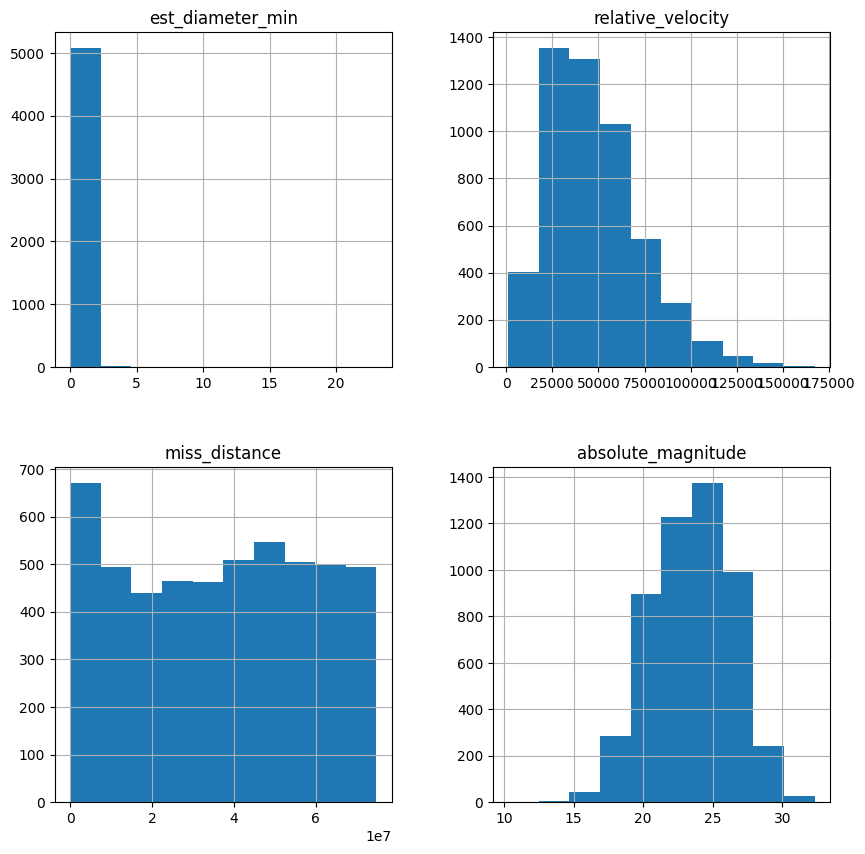

In [18]:
X_train.hist(figsize=(10,10));

***Observations:*** Not all of the features are gaussian. Let's try to take the log of the features and see if it improves them:

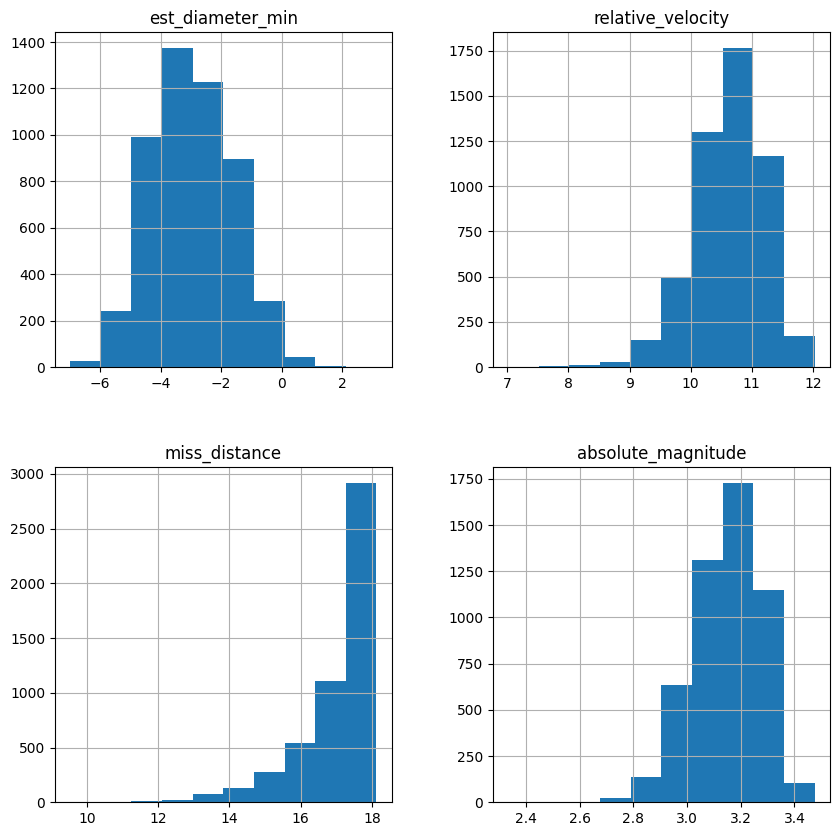

In [19]:
np.log(X_train).hist(figsize=(10,10));

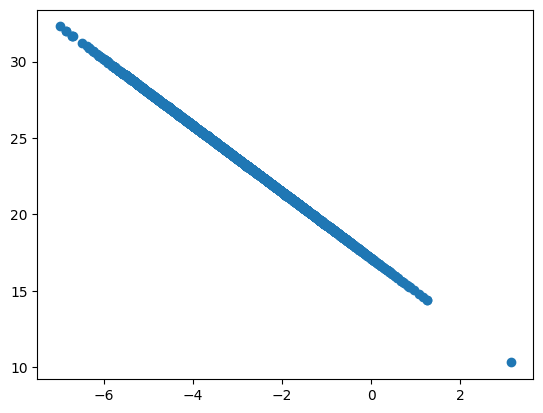

In [20]:
# Now that the est_magnitude is in log scale, let's see how to correlates with absolute_magnitude:

plt.scatter(np.log(X_train.est_diameter_min), X_train.absolute_magnitude); 

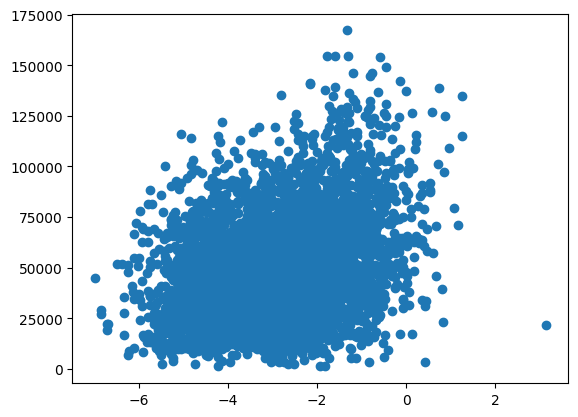

In [21]:
plt.scatter(np.log(X_train.est_diameter_min), X_train.relative_velocity); 

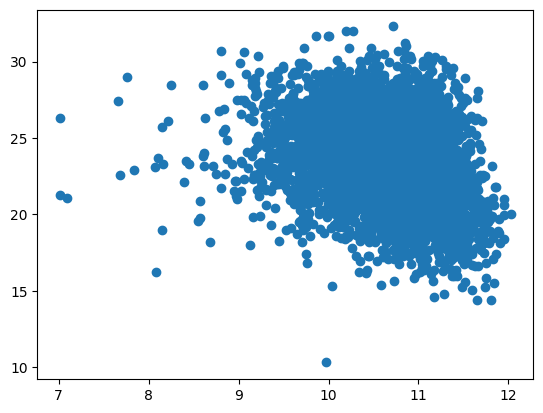

In [22]:
plt.scatter(np.log(X_train.relative_velocity), X_train.absolute_magnitude);

## Log transform

It would appear that taking the log of two of our features (`est_diameter_min` and `relative_velocity`) give better pseudo-guaussian distributions, but also that `est_diameter_min` and `absolute_magnitude` are log-transform of each other. So, we will drop `est_diameter_min` as well and keep `absolute_magnitude`. Only `relative_velocity` will be transformed (though it is a subtle change).

In [23]:
X_train.drop(columns='est_diameter_min', inplace=True)
features = X_train.columns

## Data Distribution

Finally, let's look at the distribution of our features, and of our label to see if we can learn something useful.

In [24]:
for feature in features:
    print(X_train.loc[:,feature].value_counts().sort_values(ascending=False).iloc[:15])

relative_velocity
41751.947294    1
31839.930473    1
34050.287391    1
85624.330568    1
65207.090899    1
25756.416453    1
34778.232801    1
20832.801111    1
45956.620353    1
77995.004157    1
64956.741823    1
18821.429624    1
34972.846358    1
85501.174315    1
69596.853077    1
Name: count, dtype: int64
miss_distance
4.873327e+07    2
4.618510e+07    1
6.776841e+07    1
4.664547e+07    1
4.877465e+07    1
7.002538e+07    1
1.315631e+07    1
3.059818e+06    1
5.679125e+07    1
2.765638e+07    1
7.467729e+07    1
3.639942e+07    1
2.567698e+07    1
1.498585e+07    1
4.718196e+07    1
Name: count, dtype: int64
absolute_magnitude
24.6    65
25.3    63
25.0    63
24.7    62
23.3    61
25.5    59
23.4    58
24.5    56
26.2    56
24.0    54
24.2    54
25.6    53
23.6    53
22.2    51
22.6    51
Name: count, dtype: int64


In [25]:
y_train.value_counts()

hazardous
False    4601
True      485
Name: count, dtype: int64

**Observations:** We see nothing too alarming in the features (i.e. there is not a single feature that appears often or is out of range). However, the label is clearly heavily imbalanced, and we will need to take care of this during modelling.

# Data Preparation
We have learned a lot from our EDA and we now know how to prepare our data. We will write a class that can easily be used to transform all of our data. This is to illustrate best practice, but of course, you can also achieve the same with functions or loose code - it is just not as convenient and maintainable. 

We will do the following:
1. Select only the features we need
2. Log transform `est_diameter_min` and `relative_velocity`
3. Train an `SimpleImputer` for missing values: even though we have none, we cannot be sure that the prediction set will be so well behaved!
4. Train a `StandardScaler` to scale our data

In [26]:
class DataPrepapration:
    def __init__(self, X_train):
        self.features = ['relative_velocity', 'miss_distance','absolute_magnitude']
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer()
        self.X_train = self.select_and_transform_features(X_train)
        self.X_train = self.fit_transform_data(self.X_train)
        
    def select_and_transform_features(self, X):
        X = X[self.features].copy() # To not change the original data
        X.loc[:,['relative_velocity']] = np.log(X[['relative_velocity']])
        return pd.DataFrame(X, columns=self.features)

    def fit_transform_data(self, X):
        X = X.copy()
        X = self.imputer.fit_transform(X)
        X = self.scaler.fit_transform(X)
        return pd.DataFrame(X, columns=self.features)

    def transform_data(self, X):
        X = X.copy()
        X = self.select_and_transform_features(X)
        X = self.imputer.transform(X)
        X = self.scaler.transform(X)
        return pd.DataFrame(X, columns=self.features)

    def get_X_train(self):
        return self.X_train


Let's use it to prepare our data:

In [27]:
prep = DataPrepapration(X_train)

X_train_prep = prep.get_X_train()
X_val_prep = prep.transform_data(X_val)
X_test_prep = prep.transform_data(X_test)


Let's plot a scatter matrix of the prepared X_train:

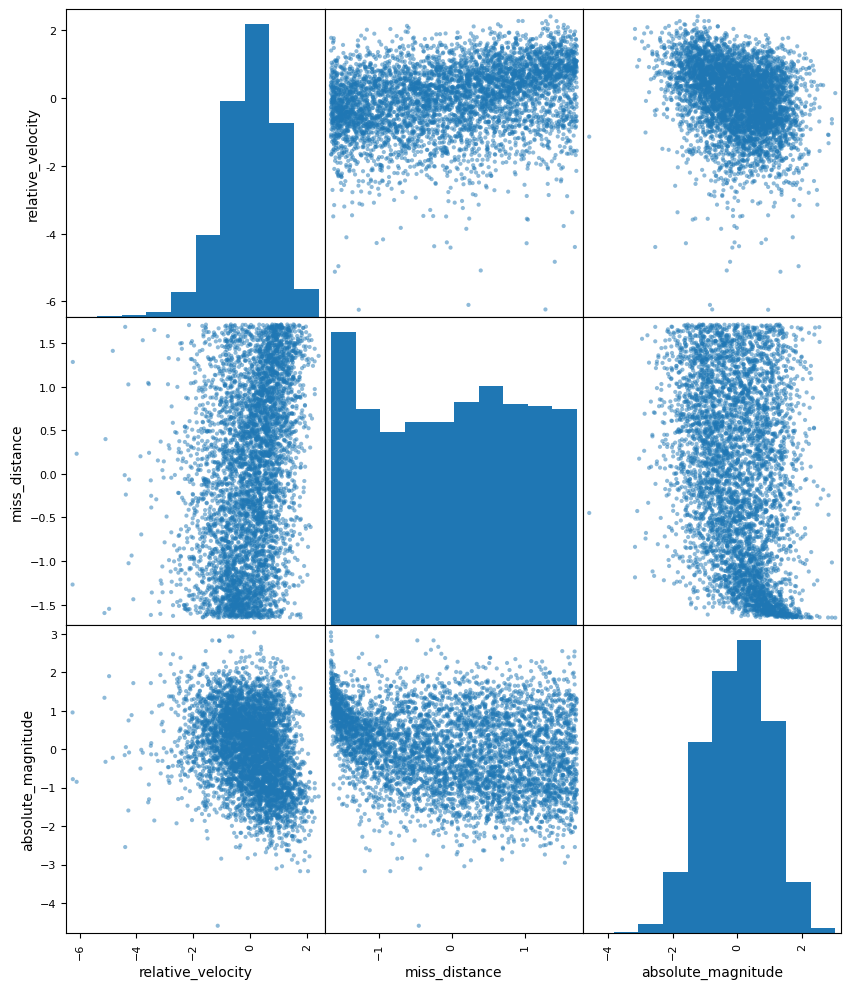

In [28]:
pd.plotting.scatter_matrix(X_train_prep, figsize=(10,12));

# Modelling
## Dummy model

Because we need to train the best algorithm at all threshold, the best metric to use here is the `roc_auc` (it is independent of our choice of threshold). The first thing to do is to get a baseline model to tell us what a random classifier score would be. Let's do that:

In [29]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="stratified").fit(X_train_prep, y_train)
print(roc_auc_score(y_val, dummy.predict(X_val_prep)))

0.5109254445339556


Score to beat is an ROC of 0.5 (pretty bad as this means random!).

## First model
Now, let's model a 'naive' approach without balancing the classes and see the impact on our validation set:

In [30]:
lr = LogisticRegression().fit(X_train_prep, y_train)
print(roc_auc_score(y_val, lr.predict(X_val_prep)))

0.5294251995315887


Pretty low score, just above our random mode. But we can improve this dramatically simply by balancing our class weights:

## Balanced model

In [31]:
lr = LogisticRegression(class_weight='balanced').fit(X_train_prep, y_train)
print(roc_auc_score(y_val, lr.predict(X_val_prep)))

0.8343908576743877


## Feature importance
Let's check if all the features are important:

In [32]:
result = permutation_importance(lr, X_val_prep, y_val, n_repeats=30, random_state=42)

In [33]:
pd.Series(result.importances_mean, X_train.columns).sort_values(ascending=False)

absolute_magnitude    0.102725
miss_distance         0.005608
relative_velocity     0.001808
dtype: float64

***Conclusions***: it seems that `absolute_magnitude` is 2 orders of magnitude more important than the other two. Let's check if a model using only this feature will perform better:

In [34]:
lr = LogisticRegression(class_weight='balanced',C=1000,max_iter=5000).fit(X_train_prep[['absolute_magnitude']], y_train)
print(roc_auc_score(y_val, lr.predict(X_val_prep[['absolute_magnitude']])))

0.8645219962294552


**Bingo!** By reducing our model to a single feature, we have gain a little bit in performance and a great deal in simplicity.

# Estimating our performance

We finally can use the test set to estimate our error:

In [35]:
predicted_performance = roc_auc_score(y_test, lr.predict(X_test_prep[['absolute_magnitude']]))
predicted_performance

0.8438187779181373

# Final training

Now that we have an estimate of our performance, we can retrain using all of the data:

In [50]:
X_prep = prep.transform_data(X)
final_lr = LogisticRegression(class_weight='balanced',
                              C=1000,max_iter=5000).fit(X_prep[['absolute_magnitude']], y)

In [54]:
# X_prep = prep.transform_data(X)
# final_lr = LogisticRegression(class_weight='balanced',
#                               C=1000,max_iter=5000).fit(X_prep, y)

# Prediction

Now that you have a fully trained algorithm, it is time to predict how hazardous unknown asteroids are. Use your trained algorithm to predict a label for the samples in `unknown_objects`. Then, save your predictions (use a `pd.Series` for ease) into a file named `predictions.csv`. Make sure to use `index=False` when you do this to not save the index as a data column in your file. Then, test your code below!

In [51]:
new_samples = prep.transform_data(unknown_objects)

In [52]:
new_samples

,relative_velocity,miss_distance,absolute_magnitude
0,-1.942031,0.328944,-0.330412
1,0.043986,-0.589689,-0.853717
2,-0.335416,0.487302,2.961904
3,-0.483415,1.193638,-0.749749
4,-2.010185,0.083277,-0.191788
...,...,...,...
1495,0.619631,0.111889,0.702335
1496,0.064017,0.443068,-1.127499
1497,0.674275,0.655958,0.522124
1498,0.288346,-0.508550,-1.370091


In [41]:
predictions = final_lr.predict(new_samples[['absolute_magnitude']])

In [42]:
final_lr.predict_proba(new_samples[['absolute_magnitude']])[:,1].mean()

0.32975412389183156

In [43]:
pd.Series(predictions, name='hazardous').to_csv('predictions.csv', index=False)

In [44]:
labels = pd.read_csv('raw_data/new_samples_labels.csv')
labels

,hazardous
0,False
1,False
2,False
3,False
4,False
...,...
1495,False
1496,False
1497,False
1498,True


In [55]:
test_1 = final_lr.predict_proba(new_samples)[:,1].mean()

In [56]:
test_1

0.32900806546807954

# 🏁  Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('new_data_prediction',
    predicted_performance=predicted_performance,
    X_train = X_train_prep
)
result.write()
print(result.check())

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.